# Explore here

                     name  popularity  duration_minutes
6  Sunset over the Empire          46          4.051333
7      Deceiver, Deceiver          47          3.862883
5        House of Mirrors          48          3.673767


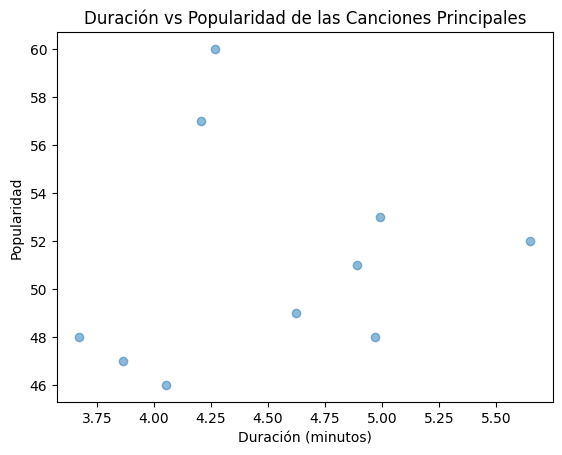

In [23]:
import os
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))
artist_id = "3TVXtAsR1Inumwj472S9r4"

response = sp.artist_top_tracks("0DCw6lHkzh9t7f8Hb4Z0Sx")
if response:
    canciones = response["tracks"]
    listacanciones = []
    for cancion in canciones:
        cancion2 = {}
        cancion2["name"] = cancion["name"]
        cancion2["popularity"] = cancion["popularity"]
        cancion2["duration_minutes"] = (cancion["duration_ms"] / (1000 * 60)) % 60
        listacanciones.append(cancion2)

cancionesdf = pd.DataFrame.from_records(listacanciones)
cancionesdf.sort_values(["popularity"], inplace = True)

print(cancionesdf.head(3))

plt.scatter(cancionesdf["duration_minutes"], cancionesdf["popularity"], alpha=0.5)
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad")
plt.title("Duración vs Popularidad de las Canciones Principales")
plt.show()